In [1]:
!pwd
import os
os.chdir('/content/drive/MyDrive/VAR')
!pwd

/content
/content/drive/MyDrive/VAR


In [ ]:
# ! pip install arch darts

In [ ]:
# !pip install dask[dataframe]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from multivariate_models import HistoricalSimulation, DeepVaR  #HistoricalSimulationBootstrap
from metrics import metrics, calculate_metrics_table
from model_evaluation import EvaluateModel


In [3]:
data_path = 'datasets/'

In [4]:
def load_data(file_path):
    return pd.read_csv(file_path, index_col='Date', parse_dates=True)

dax = load_data(data_path + 'dax_close.csv')
sp500 = load_data(data_path + 'sp500_close.csv')
dax_adj = load_data(data_path + 'dax_adj_close.csv')
sp500_adj = load_data(data_path + 'sp500_adj_close.csv')

In [5]:
window_size = 125
alpha = 99
train_size = 0.8
data = dax

In [6]:
split_index = int(len(data) * train_size)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index - window_size:]

In [7]:
num_assets = test_data.shape[1]
np.random.seed(42)
weights = np.random.rand(num_assets)
weights /= np.sum(weights)

Evaluating HistoricalSimulation (HS) model:


100%|██████████| 1275/1275 [00:05<00:00, 250.41it/s]


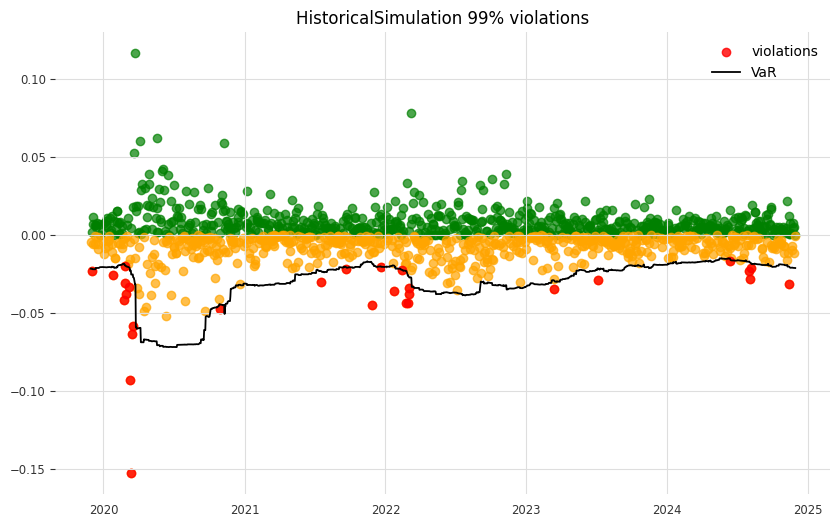

                           Value
POF Test p-value        0.000088
Berkowitz Test p-value  1.000000
Quantile Loss           0.000693
Quadratic Loss          0.029562
Smooth Loss             0.021815
Tick Loss               0.030129
Average Exceedances     0.022745
Regulatory Loss         0.000022


In [8]:
hs_model = HistoricalSimulation(alpha=alpha, window_size=window_size)
hs_model.fit(train_data)
hs_evaluator = EvaluateModel(hs_model, test_data, weights, alpha=alpha, window_size=window_size)
print("Evaluating HistoricalSimulation (HS) model:")
hs_evaluator.evaluate_model()
# hs_evaluator.generate_metrics_table()

In [12]:
deepvar_model = DeepVaR(alpha=alpha, window_size=250)
deepvar_model.fit(train_data)
deepvar_evaluator = EvaluateModel(deepvar_model, test_data, weights, alpha=alpha, window_size=250)
print("Evaluating DeepARModel (DeepVaR):")
deepvar_evaluator


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 9.4 K  | train
6 | V               | Linear           | 390    | train
-------------------------------------------------------------
9.8 K     Trainable params
0         Non-trainable params
9.8 K     Total params
0.039     Total estimated model params size (MB)
7         

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Evaluating DeepARModel (DeepVaR):
